# 프로젝트 목표
## 1. 이미지 데이터를 원하는 각도만큼 데이터 손실 없이 회전 시키기
## 2. plotly 모듈을 이용해서 3차원 surface 그래프로 나타내기

## 목표1

### 필요한 패키지 설치

### 데이터 불러오기

In [6]:
# 필요한 모듈 불러오기
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
import os

C:\Users\bcduc\Desktop\BigData\Image_Process_Tools


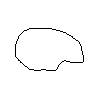

In [13]:
# 이미지 데이터 불러오기
# 데이터 로드
base = os.getcwd()
print(base)
img = Image.open(base + '\\data\\coffee7_contour.png')
img

# 이미지 데이터 처리하기

In [14]:
# 필요한 모듈 가져오기
import torchgeometry as tgm

In [15]:
# 이미지 데이터형태 바꿔주기
tmp = torch.FloatTensor([255]) - torch.FloatTensor(np.array(img))
img_tensor = torch.transpose(tmp, 0, 2).unsqueeze(0)
img_tensor.shape

torch.Size([1, 3, 100, 100])

## 이미지 처리 전략
- 1. 이미지 사이즈보다 2배 큰 캔버스를 준비
- 2. 이미지 사이즈보다 큰 곳은 값을 255
- 3. 회전 시킨다
- 4. 원래 이미지 사이즈 부분 만 다시 가져 온다

In [16]:
def FullyRotation(img_tensor, angle = 0) :
  # 캔버스 만들기
  canvas = torch.zeros(img_tensor.size()[0], img_tensor.size()[1], img_tensor.size()[2]*2, img_tensor.size()[3]*2)
  canvas.size()

  #  define the rotation center
  canvas_center = canvas.size()[3] / 2, canvas.size()[2] / 2
  img_tensor_center = img_tensor.size()[3] / 2 , img_tensor.size()[2] / 2


  # 캔버스 위에 이미지 데이터 덮어 씌우기
  canvas[
        :,
        :, 
        int(canvas_center[1] - img_tensor_center[1]) : int(canvas_center[1] + img_tensor_center[1]), 
        int(canvas_center[0] - img_tensor_center[0]) : int(canvas_center[0] + img_tensor_center[0])
  ] = img_tensor

  # create transformation (rotation)
  angle = torch.ones(1) * angle

  # define the rotation center

  # define the scale factor
  scale = torch.ones(1)

  # compute the transformation matrix
  center = torch.Tensor([canvas_center])
  M = tgm.get_rotation_matrix2d(center, angle, scale)

  # apply the transformation to original image
  _, _, h, w = canvas.shape
  img_warped = tgm.warp_affine(canvas, M, dsize=(h, w))

  # 다시 원하는 이미지 크기만큼만 가져오기
  img_warped = img_warped[
        :,
        :, 
        int(canvas_center[1] - img_tensor_center[1]) : int(canvas_center[1] + img_tensor_center[1]), 
        int(canvas_center[0] - img_tensor_center[0]) : int(canvas_center[0] + img_tensor_center[0])
  ]
  img_warped_array = img_warped.squeeze().transpose(0,2).numpy()
  return img_warped, img_warped_array

 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


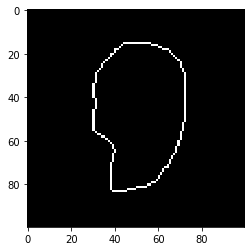

In [18]:
 # convert back to numpy
plt.imshow(FullyRotation(img_tensor, angle = 90)[1])

## 목표2

## 필요한 패키지 설치

### 데이터 불러오기

In [19]:
# 필요한 모듈 가져오기
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
plt.rcParams['figure.figsize'] = 10, 10
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline

C:\Users\bcduc\Desktop\BigData\Image_Process_Tools


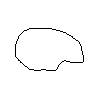

In [20]:
# 이미지 데이터 불러오기
# 데이터 로드
base = os.getcwd()
print(base)
img = Image.open(base + '\\data\\coffee7_contour.png')
img

In [44]:
# 이미지 데이터형태 바꿔주기
img_array = 255 - np.array(img)
img_array.shape

(100, 100, 3)

In [45]:
py.init_notebook_mode(connected=True)
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [49]:
plotmy3d(img_array[:,:,2], 'green_bean')